# 🌍 Predicting CO₂ Emissions Using Machine Learning
**SDG 13: Climate Action Project**

This notebook demonstrates how to build a supervised machine learning model to predict CO₂ emissions using economic and energy indicators.  
Dataset Source: [Our World in Data – CO₂ Emissions](https://github.com/owid/co2-data)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
from google.colab import files
uploaded = files.upload()


Saving owid-co2-data.csv to owid-co2-data.csv


In [4]:
df = pd.read_csv('owid-co2-data.csv')
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
columns_of_interest = ['country', 'year', 'gdp', 'population', 'energy_per_capita', 'co2']
df_filtered = df[columns_of_interest]
df_clean = df_filtered.dropna()
df_clean = df_clean[df_clean['year'] >= 1990]
df_clean.describe(include='all')


,country,year,gdp,population,energy_per_capita,co2
count,5284,5284.000000,5.284000e+03,5.284000e+03,5284.000000,5284.000000
unique,165,NaN,NaN,NaN,NaN,NaN
top,Algeria,NaN,NaN,NaN,NaN,NaN
freq,33,NaN,NaN,NaN,NaN,NaN
mean,NaN,2005.870553,7.154848e+11,5.620071e+07,25866.843581,250.977803
std,NaN,9.358301,5.155892e+12,3.633728e+08,35331.351768,1721.129432
min,NaN,1990.000000,2.571720e+08,6.722300e+04,99.053000,0.048000
25%,NaN,1998.000000,1.923419e+10,3.709859e+06,3017.322250,3.694750
50%,NaN,2006.000000,6.407577e+10,9.793271e+06,13052.541000,18.978500
75%,NaN,2014.000000,3.057329e+11,2.804462e+07,34026.371000,87.068500


### 🧠 Model Building – Random Forest Regressor


In [6]:
X = df_clean[['gdp', 'population', 'energy_per_capita']]
y = df_clean['co2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


### 📊 Model Evaluation


In [7]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.3f}')


MAE: 8.24
RMSE: 42.64
R² Score: 0.995


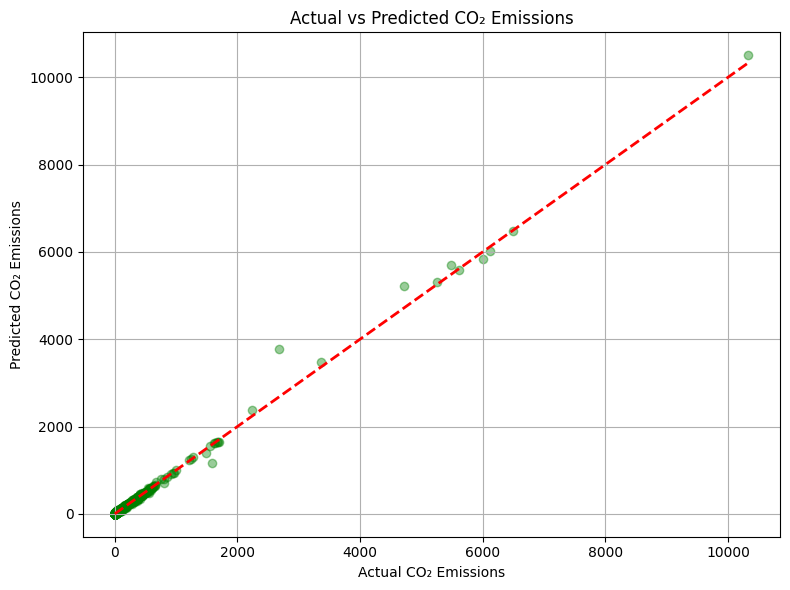

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CO₂ Emissions')
plt.ylabel('Predicted CO₂ Emissions')
plt.title('Actual vs Predicted CO₂ Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()


### ⚖️ Ethical Considerations
- **Bias**: Data from developing countries may be incomplete or outdated.
- **Fairness**: The model should not overfit to industrialized nations only.
- **Sustainability**: Insights from this model can help policymakers plan more effective climate responses.
